# Project :- Predicting House Prices with Linear Regression

In [53]:
#importing the necessary liabaries for  project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns

In [54]:
df = pd.read_csv("C:/Users/asus/Downloads/archive (1)/Housing.csv") # Reading data from a CSV file named 'Housing.csv' and storing it in a pandas DataFrame named 'df'

In [55]:
df.head() # Looking of First 5 rows data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
df.info() # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [57]:
df.describe() #Description of Data variables

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Missing Data Handling

In [58]:
df.isna().sum() # checking null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [59]:
df.columns.to_list()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [60]:
# Check Unique Values for each variables.
for i in df.select_dtypes('object').columns.to_list():
    print(f'No of unique values in {i} : {df[i].nunique()}')

No of unique values in mainroad : 2
No of unique values in guestroom : 2
No of unique values in basement : 2
No of unique values in hotwaterheating : 2
No of unique values in airconditioning : 2
No of unique values in prefarea : 2
No of unique values in furnishingstatus : 3


In [61]:
# checking any duplicates values in the data
df.duplicated().any()

np.False_

In [62]:
# separating numerical and categorical values in the list.
num_col = []
cat_col = []
for i in df.select_dtypes('int').columns.to_list():
    num_col.append(i)
for i in df.select_dtypes('object').columns.to_list():
    cat_col.append(i)

In [63]:
num_col

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [64]:
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

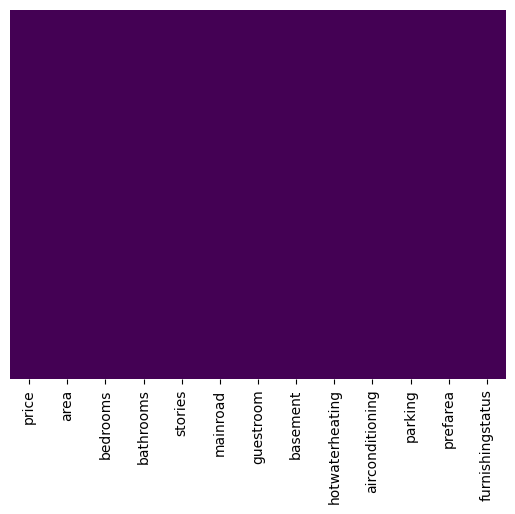

In [65]:
# checking nulls values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [66]:
# Create a copy of the DataFrame 'df' and store it in a new DataFrame 'df1'
df1 = df.copy()


## Data Cleaning

In [67]:
# Extracting the dependent variable 'price' from the DataFrame and storing it in the variable 'dependent_var'
dependent_var = df['price']

# Extracting the independent variables from the DataFrame and storing them in the variable 'independent_var'
# The independent variables include features such as area, bedrooms, bathrooms, etc.
independent_var = df[['area',
                      'bedrooms',
                      'bathrooms',
                      'stories',
                      'mainroad',
                      'guestroom',
                      'basement',
                      'hotwaterheating',
                      'airconditioning',
                      'parking',
                      'prefarea',
                      'furnishingstatus']]


In [68]:
# Iterate through categorical columns (excluding the last one) in the DataFrame 'df1'
for col in cat_col[:-1]:
    # Convert values to binary (1 for 'yes' and 0 for anything else) using a lambda function
    df1[col] = df1[col].apply(lambda x: 1 if x == 'yes' else 0)


In [69]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [70]:
status = pd.get_dummies(df1['furnishingstatus'], drop_first=True)

In [71]:
status.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [72]:
df1 = pd.concat([df1,status],axis=1)

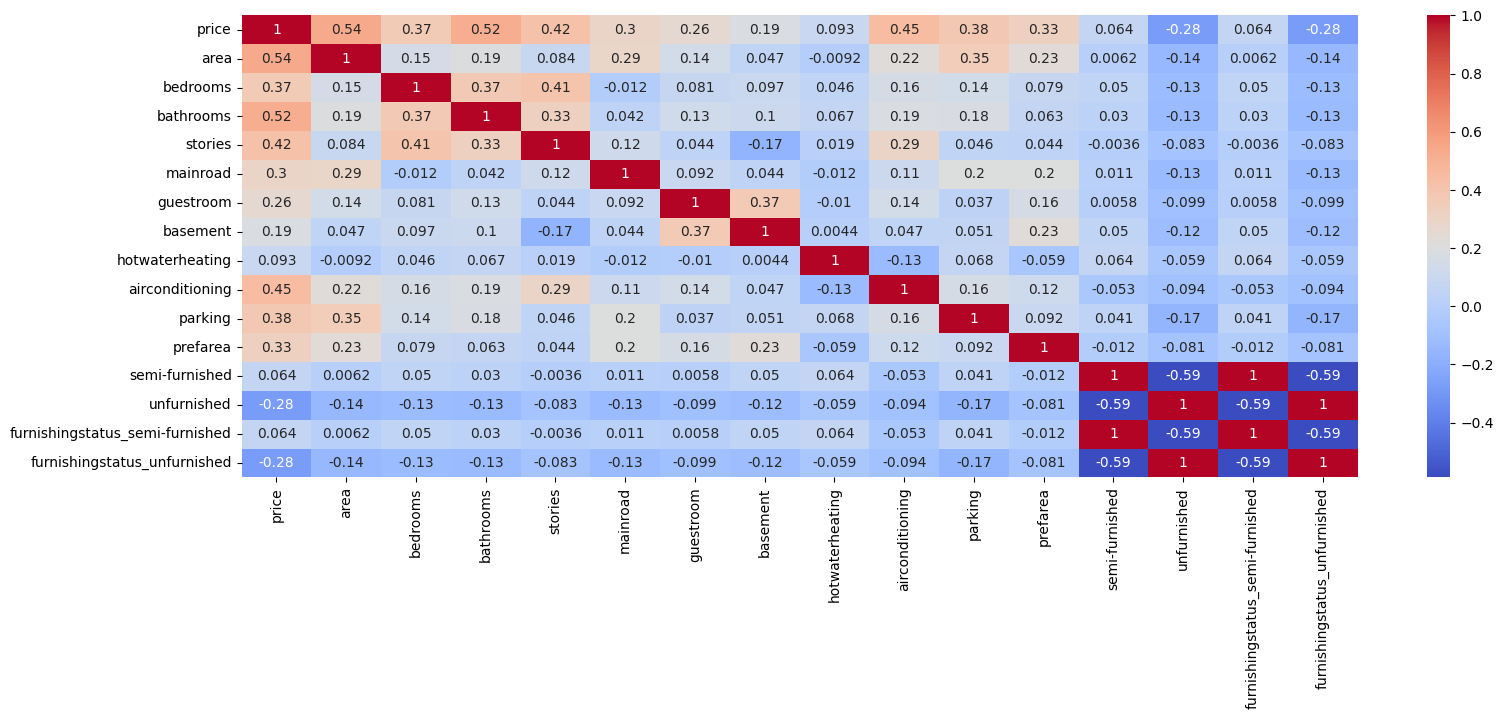

In [73]:
# Convert categorical columns to numeric (example: using one-hot encoding)
df1_encoded = pd.get_dummies(df1, drop_first=True)

# Checking correlation between encoded variables
plt.figure(figsize=(18,6))
sns.heatmap(df1_encoded.corr(), cmap='coolwarm', annot=True)
plt.show()


In [74]:
# Dropping the unecessary columns
df1.drop(['furnishingstatus'], axis=1, inplace=True)

In [75]:
df1.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False


## Removing Outliers

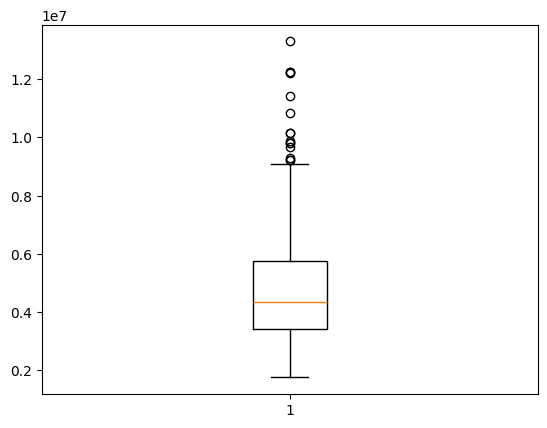

In [76]:
plt.boxplot(df1.price)
q1 = df1.price.quantile(0.25)
q3 = df1.price.quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
df1 = df1[ (df1.price >= lb) & (df1.price <= ub) ]

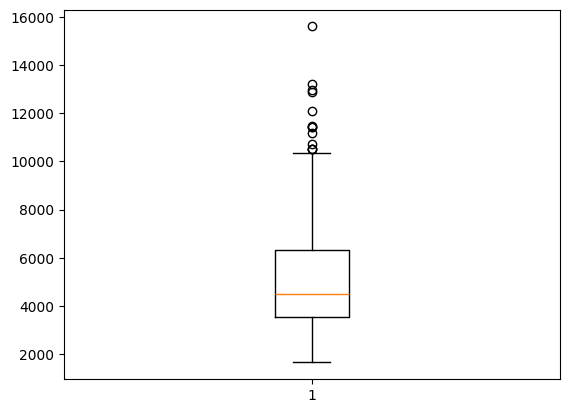

In [77]:
plt.boxplot(df1.area)
q1 = df1.area.quantile(0.25)
q3 = df1.area.quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
df1 = df1[ (df1.area >= lb) & (df1.area <= ub) ]

In [78]:
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

## EDA

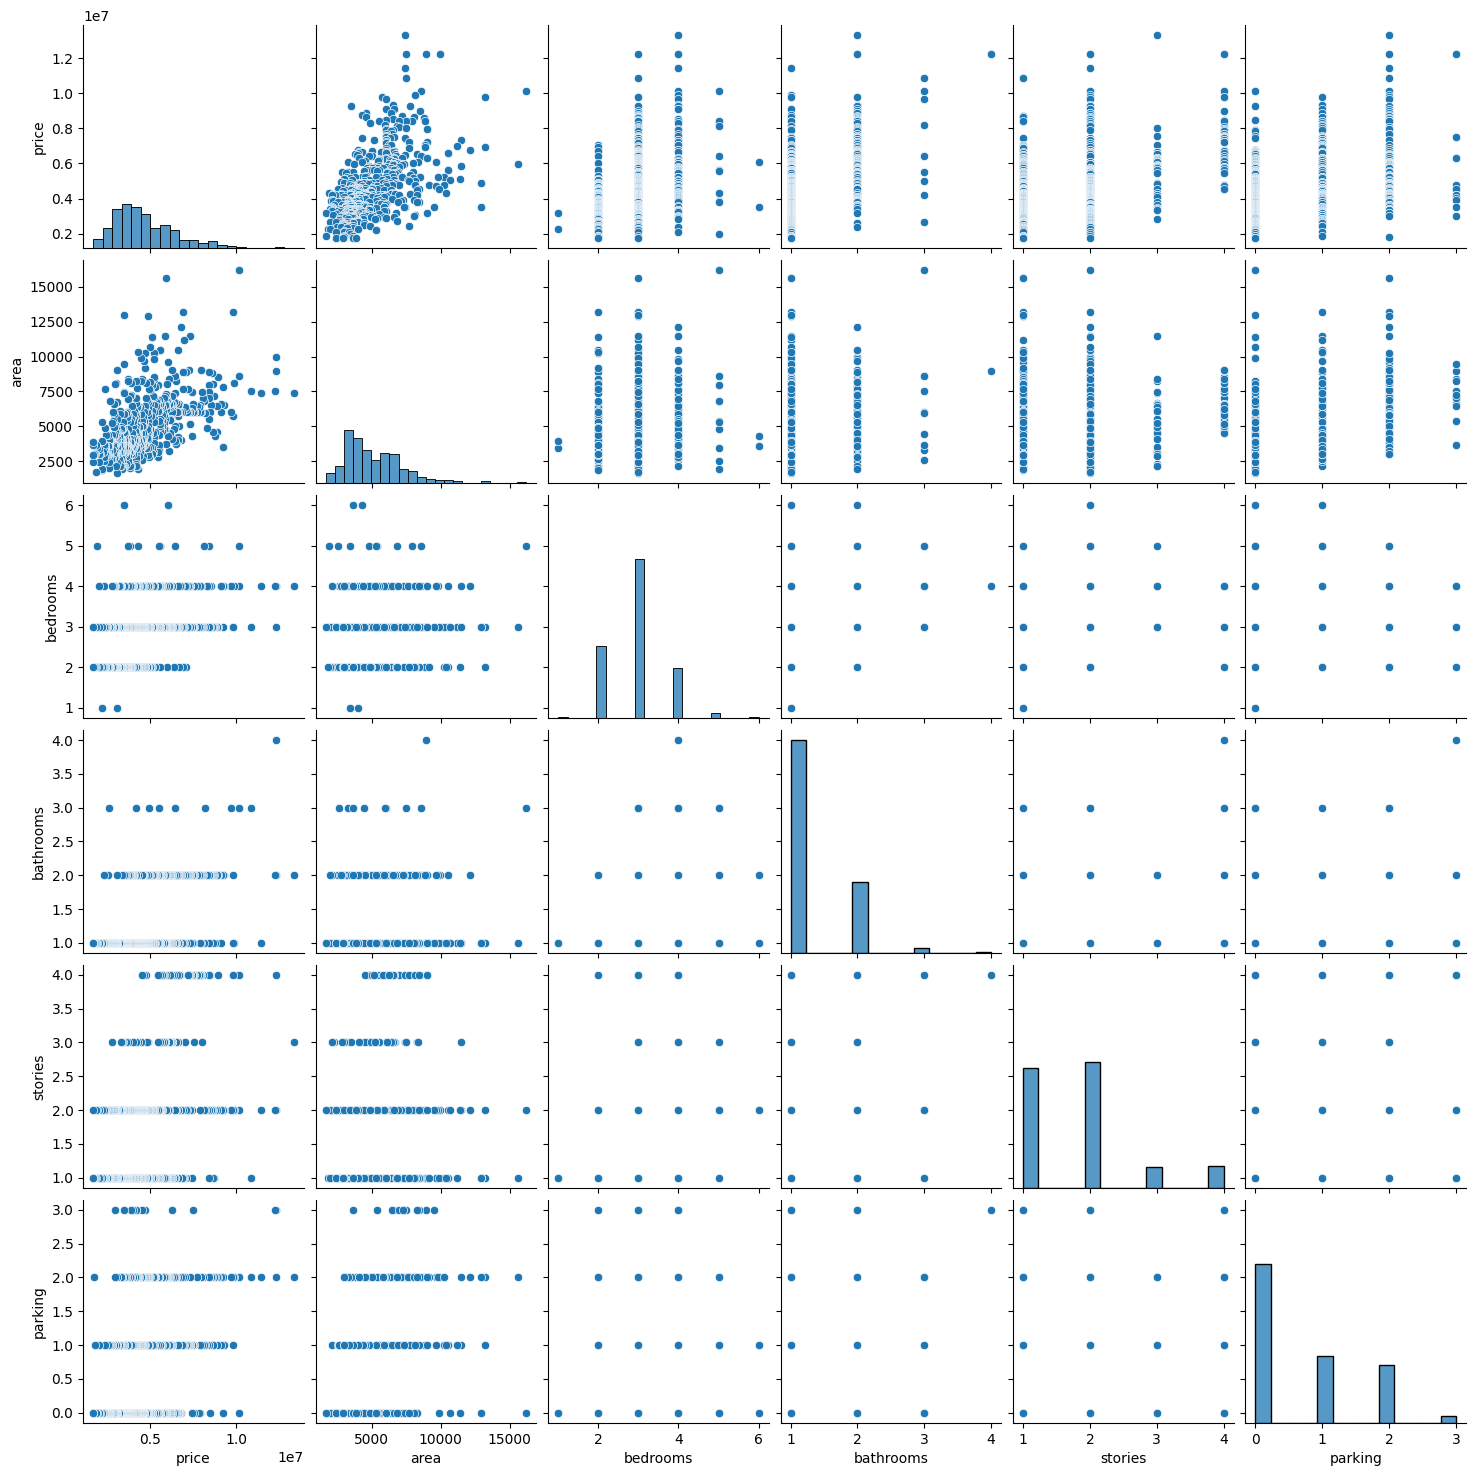

In [79]:
sns.pairplot(df)

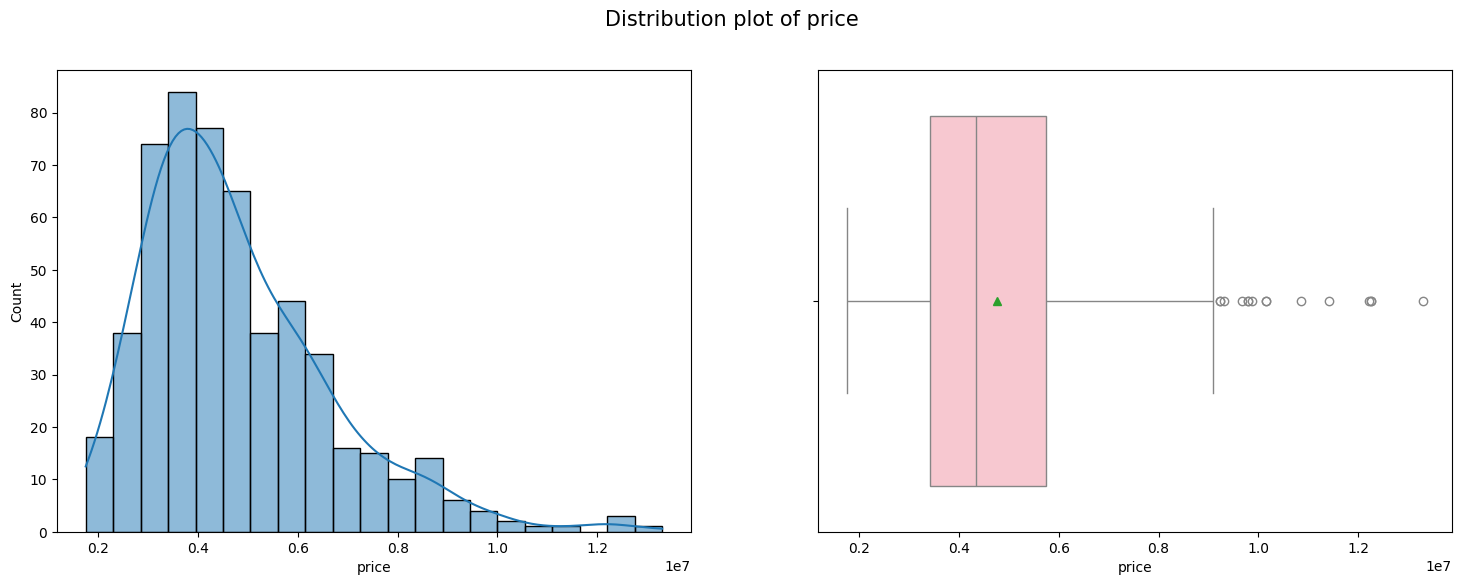

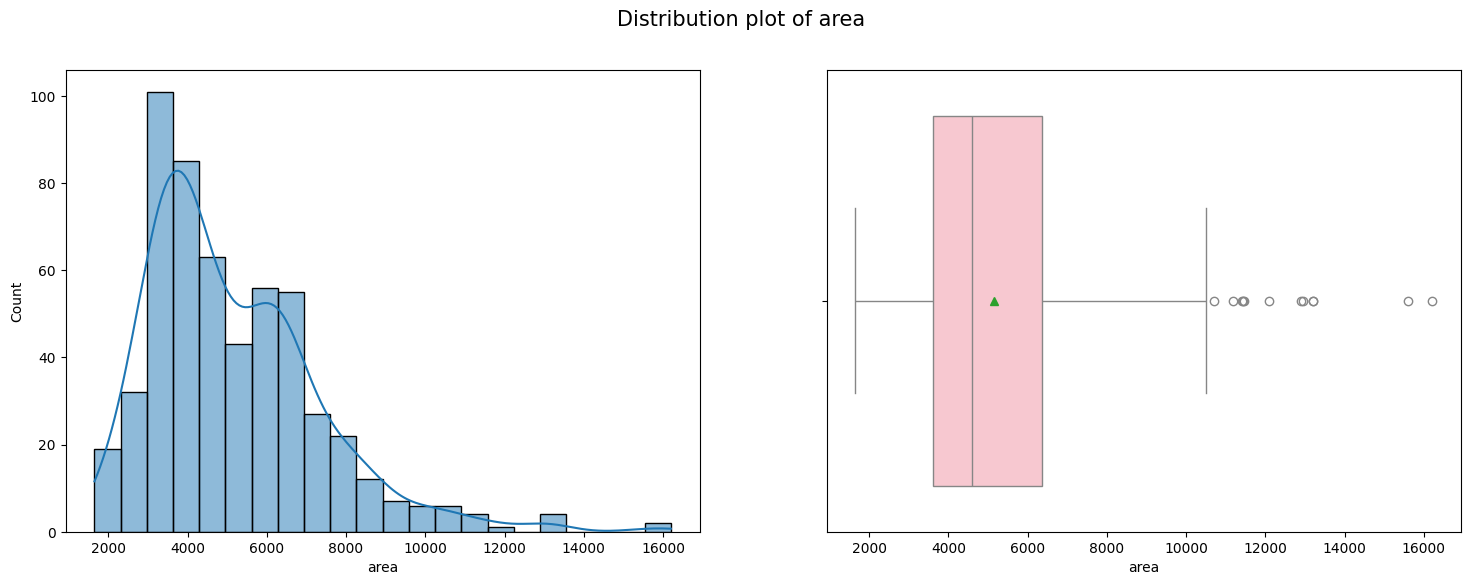

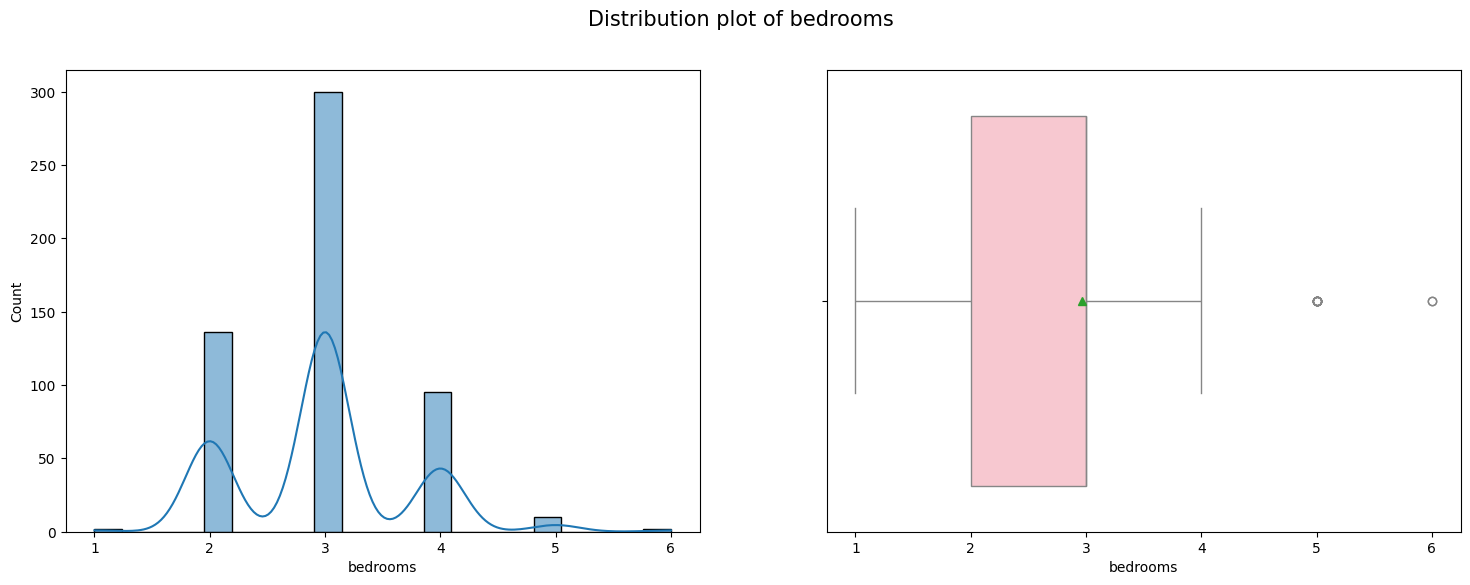

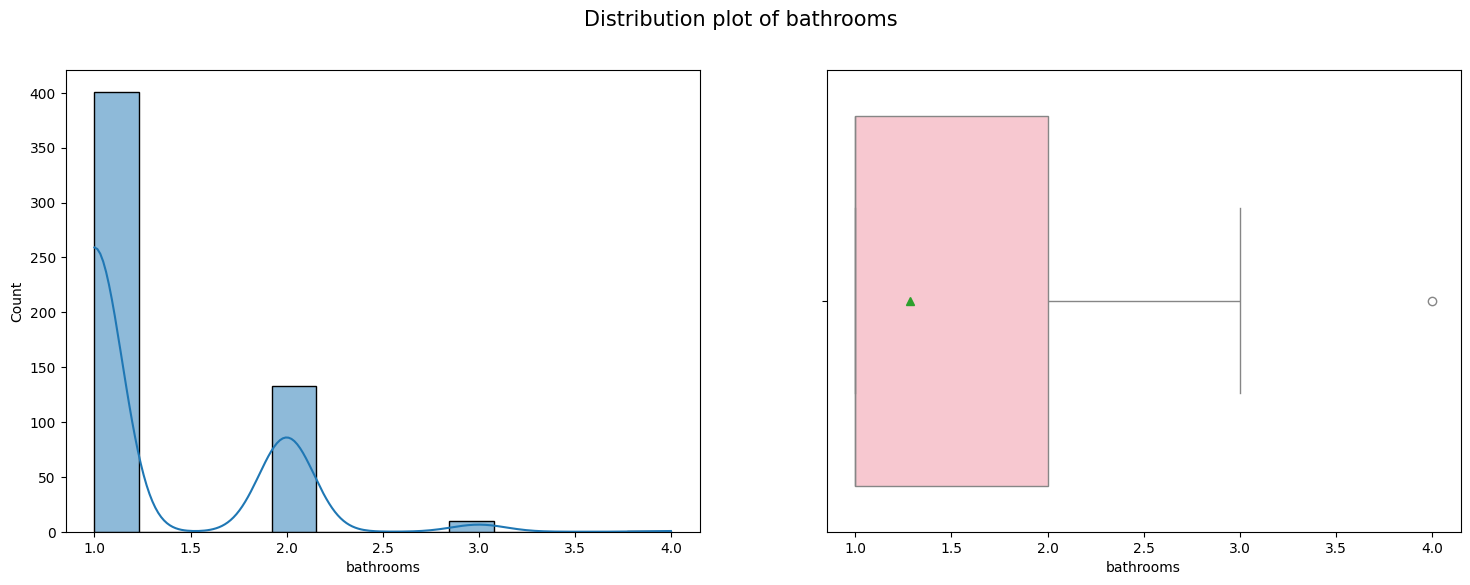

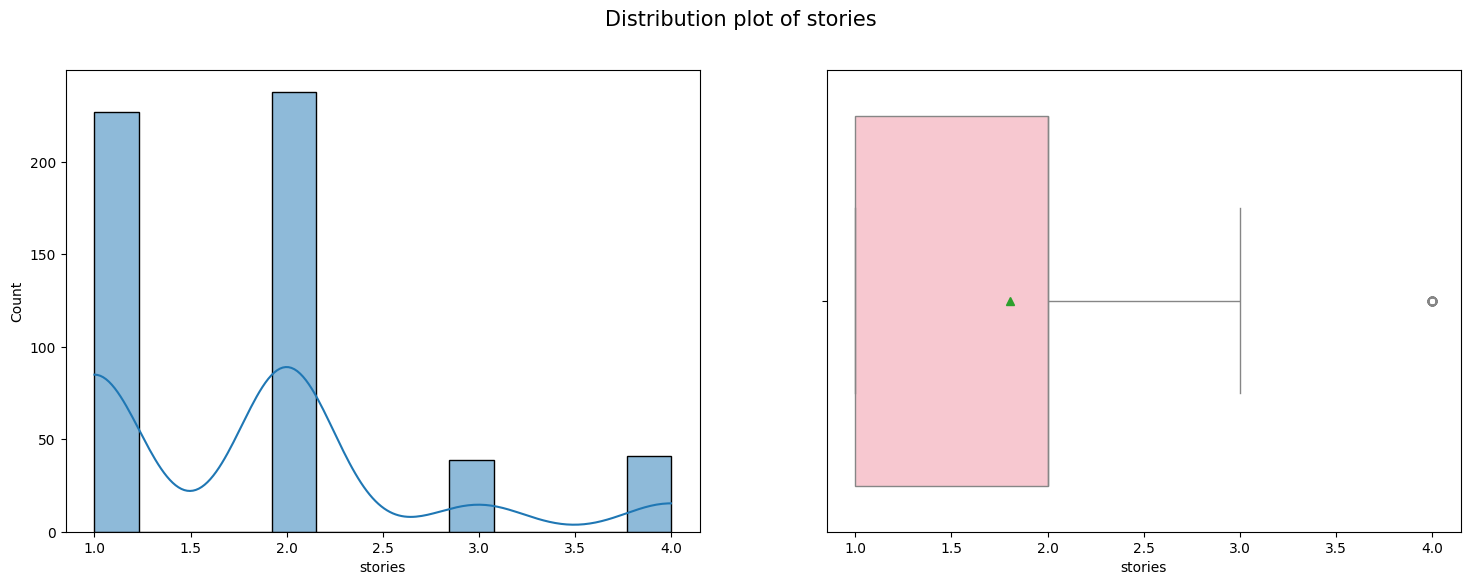

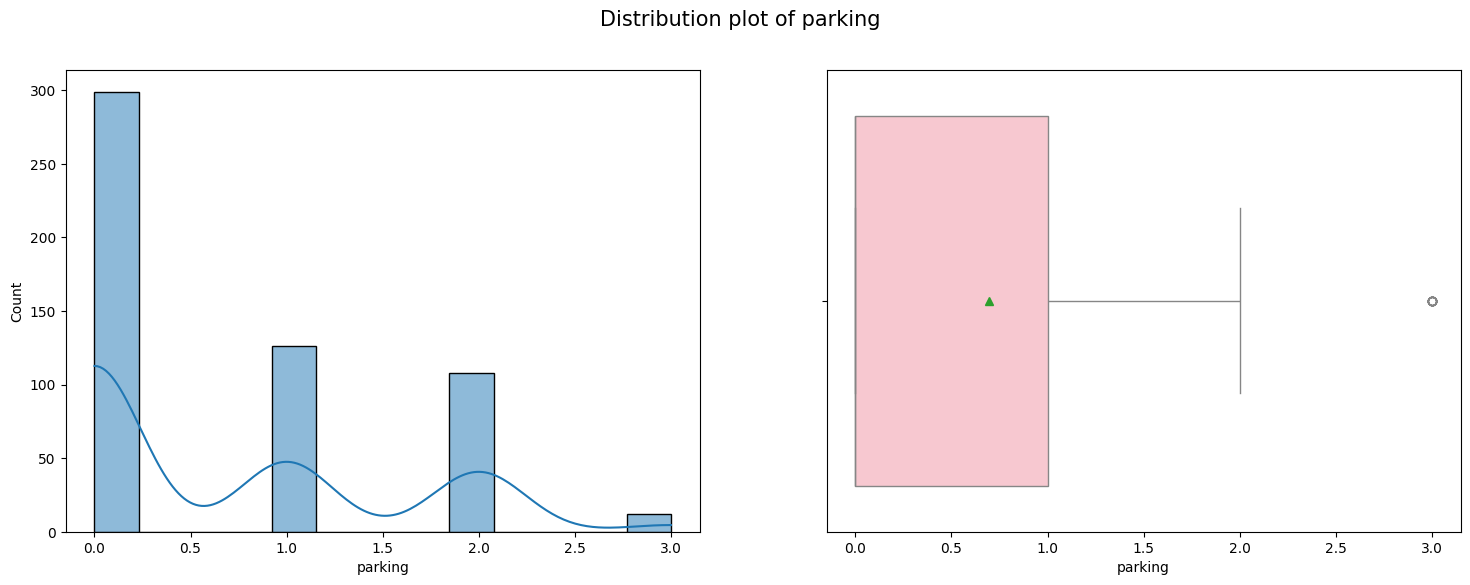

In [80]:
# Iterate through integer-type columns in the DataFrame
for col in df.select_dtypes('int').columns:
    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    
    # Plot a histogram with KDE (Kernel Density Estimate) on the first subplot
    sns.histplot(df[col], ax=axes[0], kde=True)
    
    # Plot a boxplot on the second subplot
    sns.boxplot(df[col], ax=axes[1], orient='h', showmeans=True, color='pink')
    
    # Set a title for the figure
    fig.suptitle("Distribution plot of " + col, fontsize=15)
    
    # Display the plots
    plt.show() 


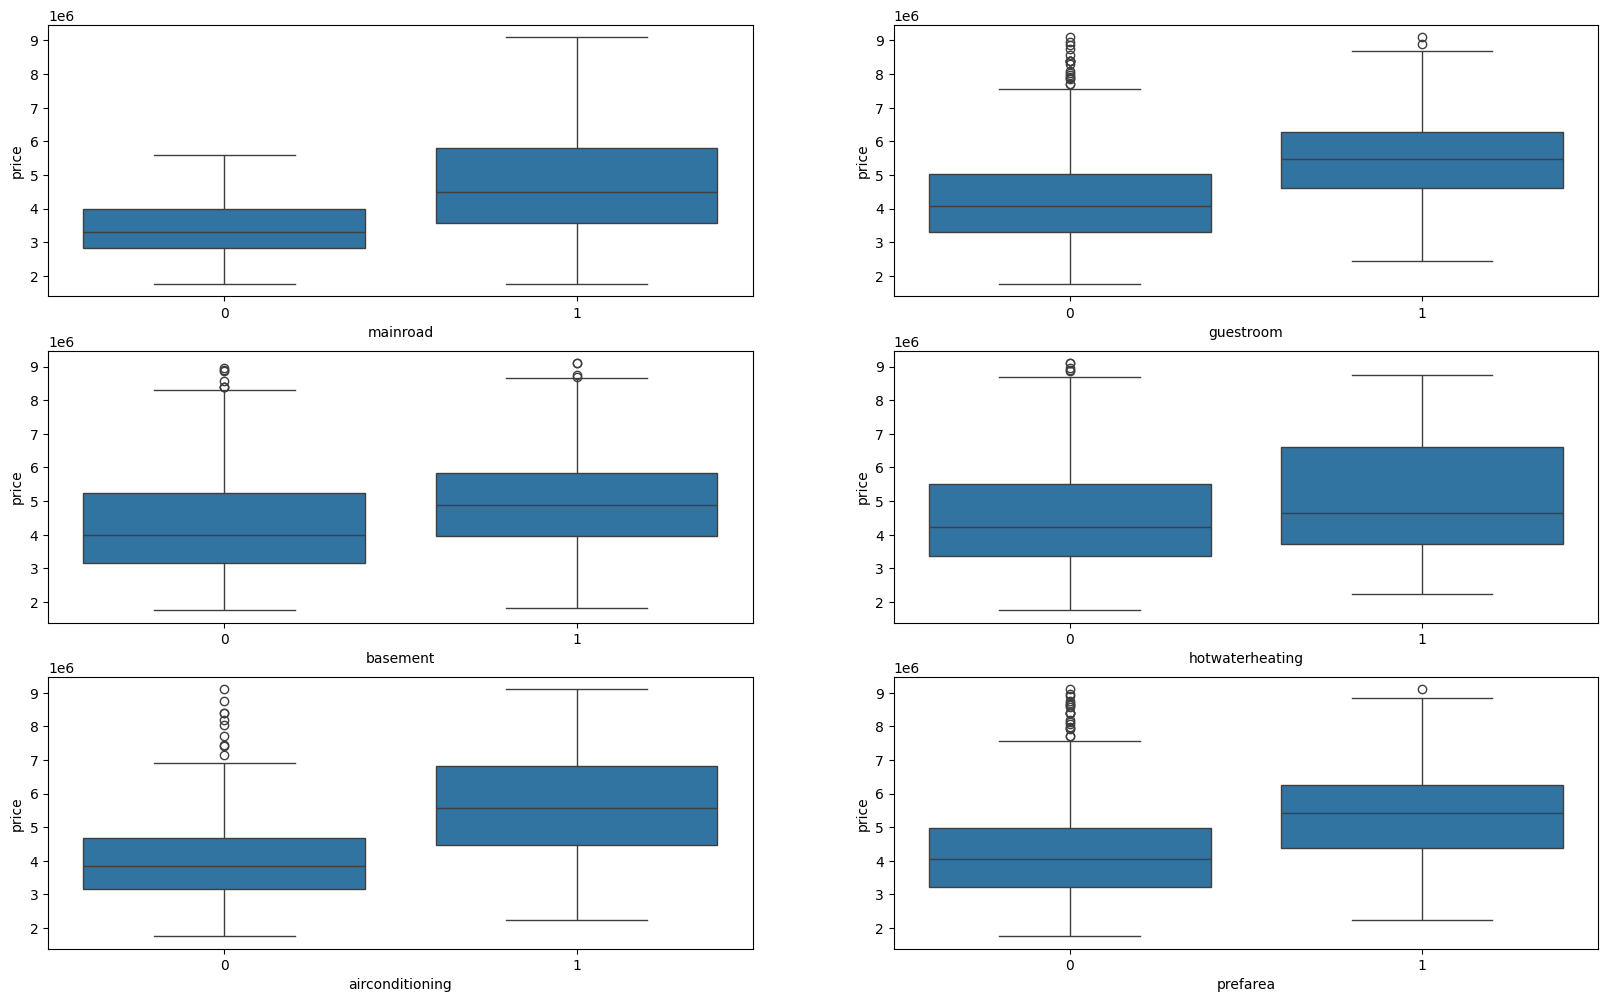

In [81]:
plt.figure(figsize=(20, 12))
for i in range(len(cat_col[:-1])):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = df1[cat_col[i]], y = df1.price )
plt.show()   

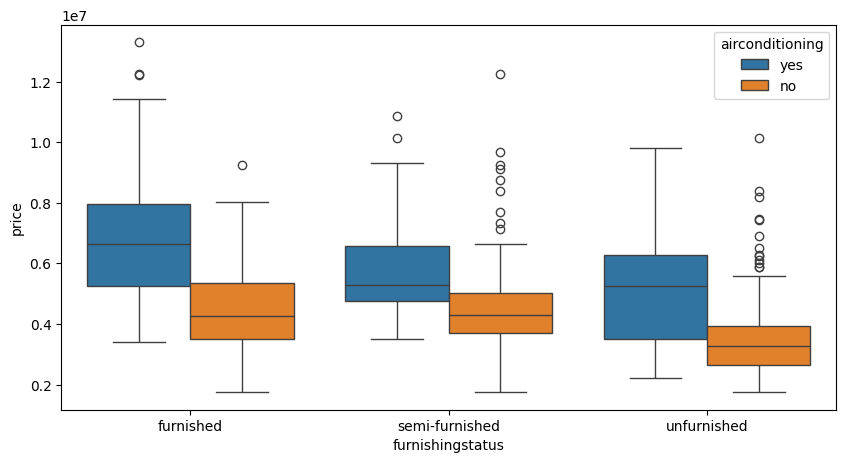

In [82]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

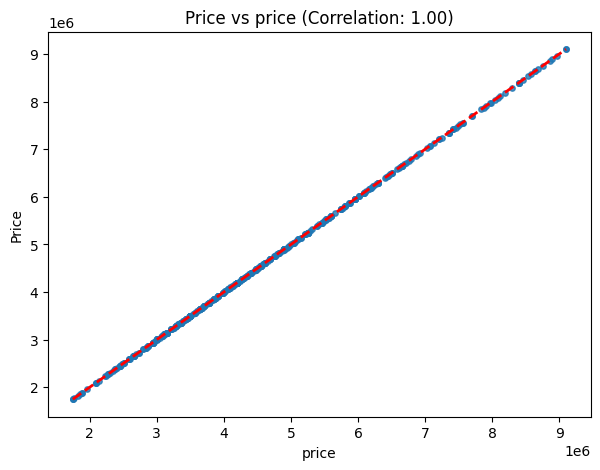

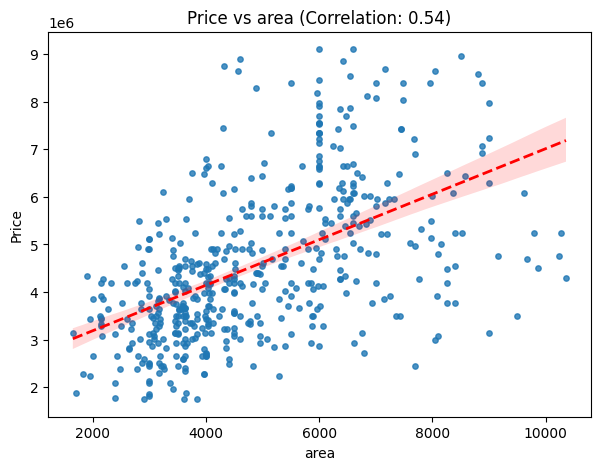

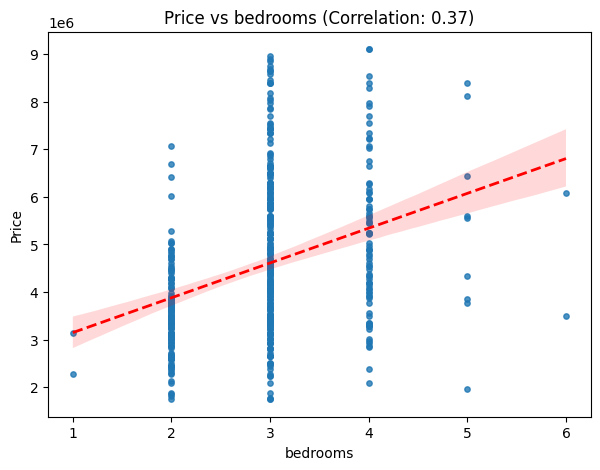

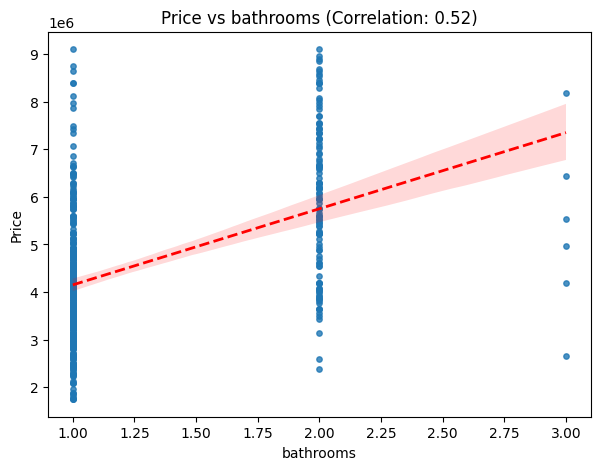

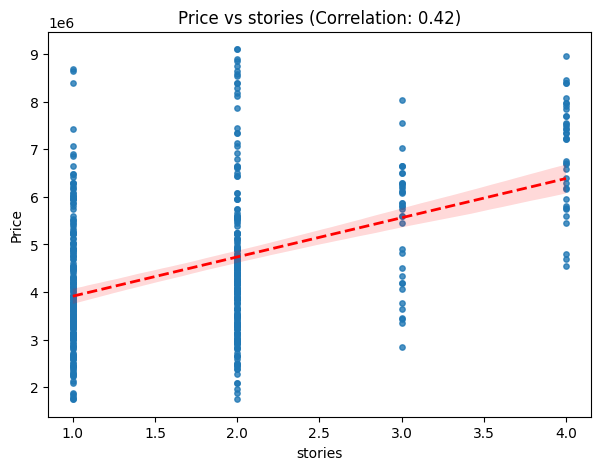

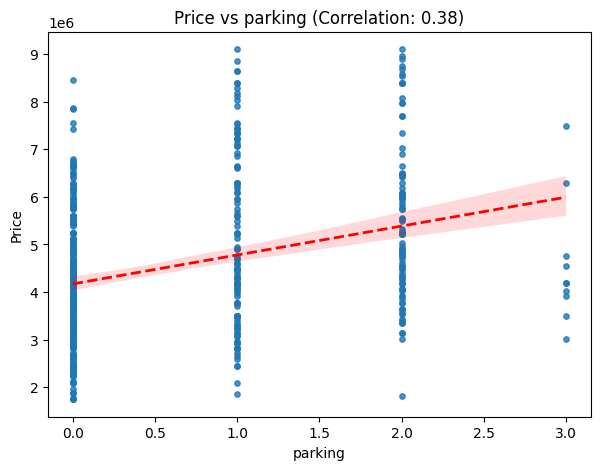

In [83]:
numerical_col = df.describe().columns
for i in num_col[:]:
    plt.figure(figsize=(7, 5))

    sns.regplot(x=i, y='price', data=df1, scatter_kws={'s': 15}, line_kws={'color':'r','lw':2,'linestyle':'--'})

    plt.title(f'Price vs {i} (Correlation: {df[i].corr(df["price"]):.2f})')
    plt.xlabel(i)
    plt.ylabel('Price')

    plt.show()

### Feature Selection

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [85]:
cal_vif(df1[[i for i in df1.describe().columns if i not in ['Price']]])

,variables,VIF
0,price,26.572676
1,area,12.497891
2,bedrooms,15.573570
3,bathrooms,11.255393
4,stories,8.764453
5,mainroad,6.989731
6,guestroom,1.526052
7,basement,2.055115
8,hotwaterheating,1.101377
9,airconditioning,1.943605


In [86]:
df1.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False


In [87]:
X = df1.drop(['price'], axis=1).values# Independent Features
y = df1['price'].values # Dependent Features

## Building Linear Model

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 13)
(104, 13)
(413,)
(104,)


### Data Scaling

In [90]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train

array([[0.10093978, 0.8       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.29585799, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62072166, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23088525, 0.4       , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.16707275, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5341687 , 0.6       , 0.5       , ..., 1.        , 1.        ,
        0.        ]])

### Model Building

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
le = LinearRegression()

In [94]:
le_model = le.fit(X_train, y_train)

In [95]:
le_model.score(X_train, y_train)

0.6581636083036775

In [96]:
le_model.intercept_

np.float64(2053617.2503847792)

In [97]:
le_model.coef_

array([2122621.95550406,  498373.98119343, 1400151.42538716,
       1378550.71215474,  389351.46347969,  417119.93326733,
        309972.44958276,  694272.52380302,  867780.084698  ,
        643079.16525995,  513811.01477822,   -2498.33581169,
       -271269.98384299])

In [98]:
y_pred_linear = le_model.predict(X_test)

#### Evaluation Matrics For Linear Regression

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [100]:
# Calculating the performance metrics.
MAE_linear = mean_absolute_error(y_test,y_pred_linear)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = mean_squared_error(y_test,y_pred_linear)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = np.sqrt(MSE_linear)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = r2_score(y_test, y_pred_linear)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = 1-(1-r2_score(y_test,y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean Absolute Error : 734127.1131194807
Mean squared Error : 954173744480.8947
Root Mean squared Error : 976818.1737052677
R2 score : 0.674767344781106
Adjusted R2 score : 0.6277892945828214


In [101]:
df_pre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_linear.flatten()})

max_decimal_places = df_pre['Actual'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).max()

df_pre['Predicted'] = df_pre['Predicted'].round(decimals=max_decimal_places)

print(df_pre)

      Actual  Predicted
0    3920000  6094154.0
1    2275000  3711890.0
2    3010000  3269147.0
3    5243000  4547202.0
4    2233000  4262182.0
..       ...        ...
99   5033000  4042996.0
100  4200000  4140158.0
101  1890000  2842879.0
102  1767150  2435173.0
103  3836000  3249228.0

[104 rows x 2 columns]


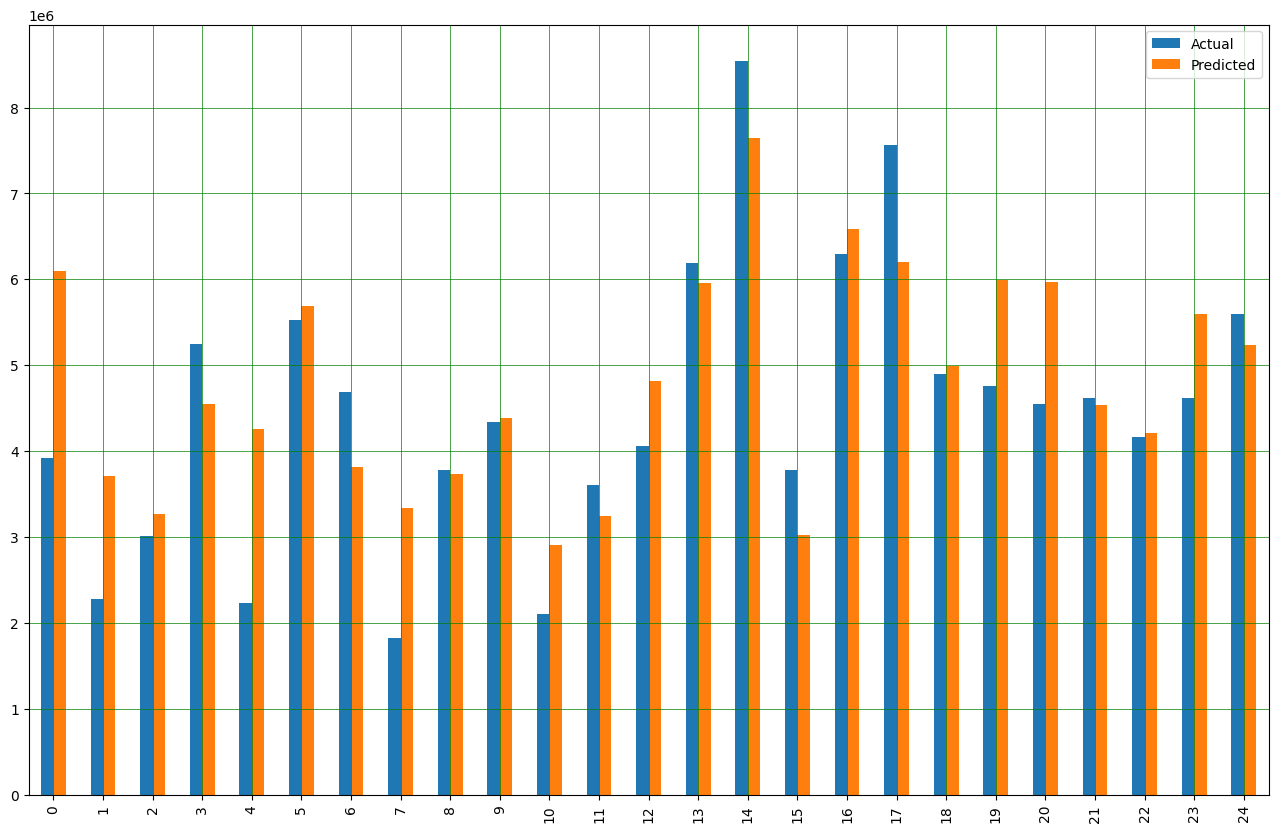

In [102]:
df_pre.head(25).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Linear Regression Plot Predication vs Actual

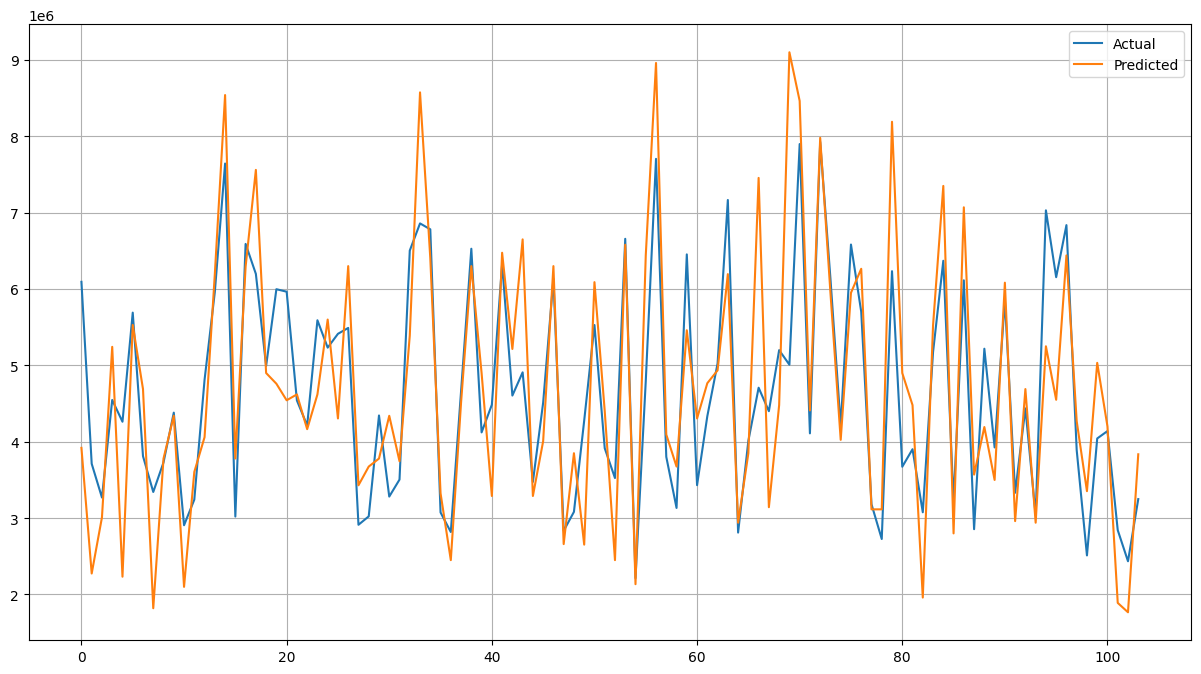

In [103]:
# Linear Regression Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(y_pred_linear)
plt.plot(y_test)
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

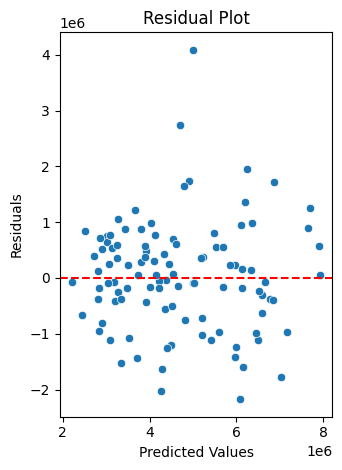

In [104]:
# Residual plot to check for homoscedasticity
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_linear, y=y_test - y_pred_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.tight_layout()
plt.show()
